# Week 8 – Applied Chaos (Wrapping Up)

### Aim: Work through lectures 24–25, undertake an applied project, and write the Final Reflective Report.

#### Schedule w/c 26th July

Monday – [Lecture 24](https://www.youtube.com/watch?v=LPILtK-53m8&list=PLbN57C5Zdl6j_qJA-pARJnKsmROzPnO9V&index=24) + OOP ch. 4 + LA for FRR

Tuesday – LO1 for FRR

Wednesday – [Lecture 25](https://www.youtube.com/watch?v=FJn9xIW5d20&list=PLbN57C5Zdl6j_qJA-pARJnKsmROzPnO9V&index=25) + *The Misbehaviour of Markets* ch. XIII + LO2 for FRR

Thursday – Project + LO3 for FRR

Friday – Project + Week 8 Reflective Blog post + LO4 for FRR

Saturday – Project + Clean up GitHub repository + LO5 for FRR

Sunday – Upload Week 8 Jupyter Notebook to GitHub

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import slicc_tools as st

## Lecture 24 – Hénon Map (ch. 12.2)

Two-dimensional map with a strange attractor devised by the theoretical astronomer Michel Hénon in 1976.

$\rightarrow$ Illustrates the fractal microstructure of strange attractors.

The Hénon map is governed by the equations:

$x_{n+1} = y_n + 1 - a x_n^2$

$y_{n+1} = b x_n$

where $a, b$ are adjustable parameters (Hénon used $a = 1.4$ and $b = 0.3$).
\
\
\
These equations are obtained by considering the stretching and folding of the phase space (p. 436).

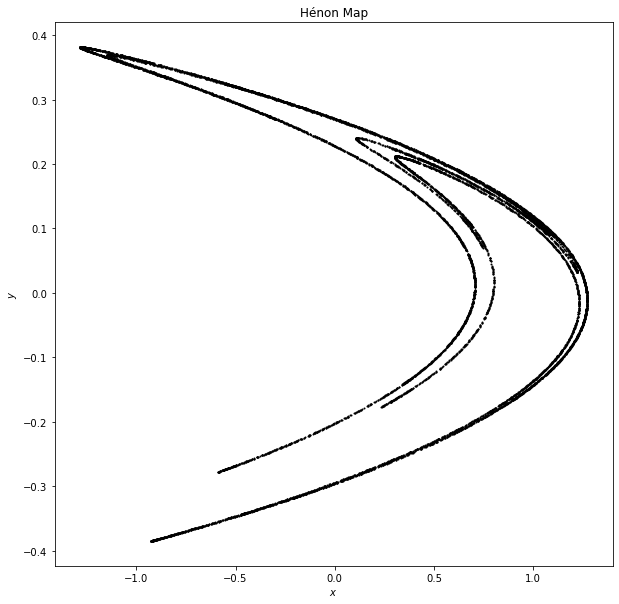

In [15]:
#Define the governing equations of the Hénon map
def henon(v, a, b):
    x, y = v[0], v[1]
    
    x_next = y + 1 - a * x**2
    y_next = b * x
    
    return np.array([x_next, y_next])

plt.figure(figsize=(10, 10))

#Choose a starting condition within the trapping region (p. 437)
v = [0.5, 0.2]

#Plot the first 10000 iterations of the map
for t in range(10000):
    plt.plot(v[0], v[1], 'o', ms = 1, c = 'k')
    
    v = henon(v, 1.4, 0.3)

#Format labels
plt.title('Hénon Map')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
    
plt.show()

### Properties of the Hénon Map

1) The map is *invertible*, i.e. given $\left( x_{n+1}, y_{n+1} \right)$, we can solve uniquely for $\left( x_{n}, y_{n} \right)$.
> See Example 12.2.1 $\Rightarrow b \neq 0$.

2) It contracts areas (like the Lorenz flow), i.e. the map is dissipative.
> Consider the Jacobian $J = \left( \begin{matrix} \frac{\partial x_{n+1}}{\partial x_n}&\frac{\partial x_{n+1}}{\partial y_n}\\\frac{\partial y_{n+1}}{\partial x_n}&\frac{\partial y_{n+1}}{\partial y_n} \end{matrix} \right) = \left( \begin{matrix} -2a x_n & 1 \\ b & 0 \end{matrix} \right)$, so $\det{J} = -b \Rightarrow$ areas contract for $|b| < 1$.

3) It has a *trapping region* that contains the strange attractor (p. 437).
> Unlike the Lorenz system which has a *universal* attractor, some trajectories of the Hénon system escape to infinity due to the quadratic term.

When zooming in on the attractor, notice the resemblance to the Cantor set (Week 7) as well as to the rings of Saturn.

**Next Actions**:
- Do exercises ~12.1.8~ (Hénon's area-preserving quadratic map), ~12.1.9~ (the standard map), and ~12.3.1~ (numerical experiments with the Rössler map)
- ~Finish ch. 4 of the [OOP module](https://www.linkedin.com/learning/python-object-oriented-programming/) and upload the corresponding notebook to GitHub~
- ~Write the learning abstract (LA) for the Final Reflective Report (FRR)~

**Exercise 12.1.8** Hénon's Area-Preserving Quadratic Map

$x_{n+1} = x_n \cos{\alpha} - \left( y_n - x_n^2 \right) \sin{\alpha}$

$y_{n+1} = x_n \sin{\alpha} + \left( y_n - x_n^2 \right) \cos{\alpha}$

where the parameter $0 \leq \alpha \leq \pi$.

**a)** We consider the Jacobian of the system:

$J = \left( \begin{matrix} \frac{\partial x_{n+1}}{\partial x_n}&\frac{\partial x_{n+1}}{\partial y_n}\\\frac{\partial y_{n+1}}{\partial x_n}&\frac{\partial y_{n+1}}{\partial y_n} \end{matrix} \right) = \left( \begin{matrix} \cos{\alpha} + 2 x_n \sin{\alpha} & -\sin{\alpha}\\ \sin{\alpha} - 2 x_n \cos{\alpha} & \cos{\alpha} \end{matrix} \right)$, so $\det{J} = \cos^2{\alpha} + 2 x_n \sin{\alpha}\cos{\alpha} + \sin^2{\alpha} - 2 x_n \sin{\alpha}\cos{\alpha} = \cos^2{\alpha}+ \sin^2{\alpha} = 1$

Thus, the map is area-preserving.

**b)** We solve both equations for $y_n$:

$y_n = \frac{x_n \cos{\alpha}}{\sin{\alpha}} + x_n^2 - \frac{x_{n+1}}{\sin{\alpha}}$ and $y_n = - \frac{x_n \sin{\alpha}}{\cos{\alpha}} + x_n^2 + \frac{y_{n+1}}{\cos{\alpha}}$ which combined yield:

$\frac{x_n \cos{\alpha}}{\sin{\alpha}} - \frac{x_{n+1}}{\sin{\alpha}} = - \frac{x_n \sin{\alpha}}{\cos{\alpha}} + \frac{y_{n+1}}{\cos{\alpha}} \Rightarrow x_n = x_{n+1} \cos{\alpha} + y_{n+1} \sin{\alpha}$ which we can plug into one of the equations for $y_n$:

$y_n = y_{n+1} \cos{\alpha} - x_{n+1} \sin{\alpha} + y_{n+1}^2 \sin^2{\alpha} + x_{n+1}^2 \cos^2{\alpha} + x_{n+1} y_{n+1} \sin{\alpha} \cos{\alpha}$. These are the inverse equations.

**c)** We can reuse the Hénon map code from above to plot the area-preserving map.

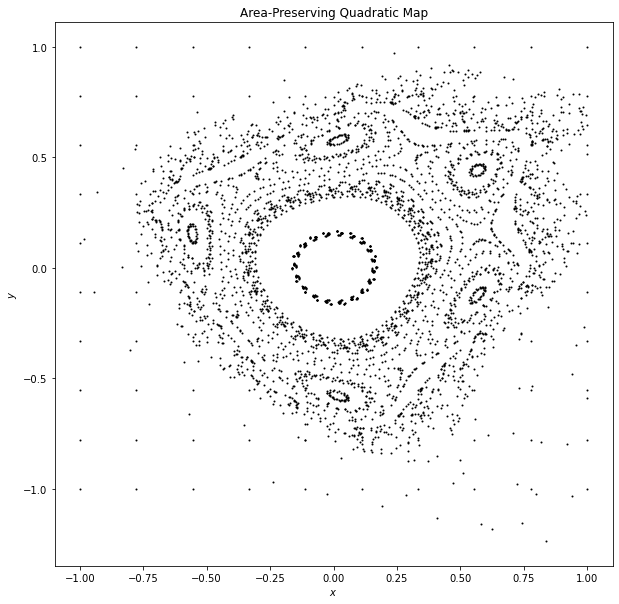

In [25]:
#Define the governing equations of the area-preserving Hénon map
def area_preserve(v, alpha):
    x, y = v[0], v[1]
    
    x_next = x * np.cos(alpha) - (y - x**2) * np.sin(alpha)
    y_next = x * np.sin(alpha) + (y - x**2) * np.cos(alpha)
    
    return np.array([x_next, y_next])

plt.figure(figsize=(10, 10))

#Create a list of starting conditions within the square -1 < x, y < 1 (inclusive)
v_list = [[x_0, y_0] for x_0 in np.linspace(-1, 1, 10) for y_0 in np.linspace(-1, 1, 10)]

#Plot the first 100 iterations of the map for each initial condition
for v in v_list:
    for t in range(100):
        plt.plot(v[0], v[1], 'o', ms = 1, c = 'k')
    
        v = area_preserve(v, np.arccos(0.24))
        
        #Add condition to stop iterating if the point escapes beyond the trapping region
        if v[0] >= 1 or v[1] >= 1:
            break

#Format labels
plt.title('Area-Preserving Quadratic Map')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
    
plt.show()

**Exercise 12.1.9** The Standard Map (Boris Chirikov)

$x_{n+1} = x_n + y_{n+1}$

$y_{n+1} = y_n + k \sin{x_n}$

where the nonlinearity parameter $k \geq 0$.

See this [Scholarpedia article](http://www.scholarpedia.org/article/Chirikov_standard_map) for in-depth analysis.

**a)** Again, we consider the Jacobian:

$J = \left( \begin{matrix} \frac{\partial x_{n+1}}{\partial x_n}&\frac{\partial x_{n+1}}{\partial y_n}\\\frac{\partial y_{n+1}}{\partial x_n}&\frac{\partial y_{n+1}}{\partial y_n} \end{matrix} \right) = \left( \begin{matrix} 1 + k\cos{x_n} & 1 \\ k\cos{x_n} & 1 \end{matrix} \right) \Rightarrow \det{J} = 1 + k\cos{x_n} - k\cos{x_n} = 1$, so the map is area-preserving for all values of $k$.

**b)** $k=0$ (integrable limit)

**c)** $k = 0.5$

**d)** $k = 1$

**e)** $k = 2$

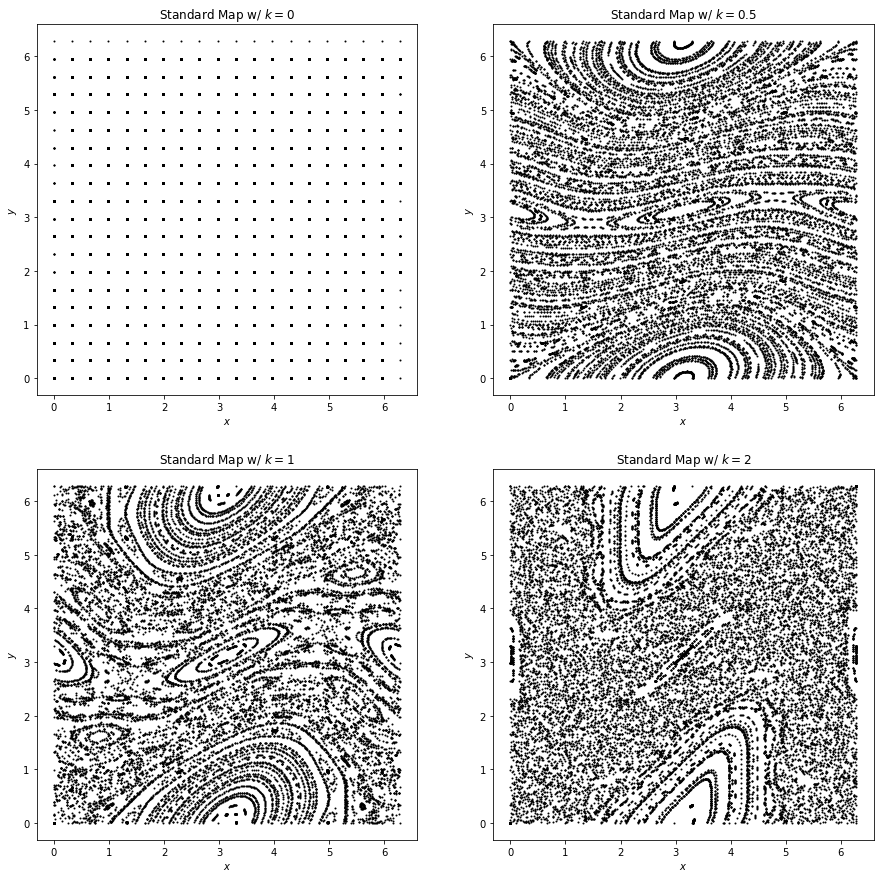

In [4]:
#Define the governing equations of the standard map
def standard(v, k):
    x, y = v[0], v[1]
    
    y_next = (y + k * np.sin(x)) % (2*np.pi)
    x_next = (x + y_next) % (2*np.pi)
    
    return np.array([x_next, y_next])

fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax = ax.flatten()

#Create a list of starting conditions within 0 < x < 2*pi, 0 < y < 2*pi
v_list = [[x_0, y_0] for x_0 in np.linspace(0, 2*np.pi, 20) for y_0 in np.linspace(0, 2*np.pi, 20)]

#Declare a list of values of the nonlinearity parameter k
k_list = [0, 0.5, 1, 2]

#Plot the first 50 iterations of the map for each initial condition and parameter value
for n in range(4):
    k = k_list[n]
    for v in v_list:
        for t in range(50):
            ax[n].plot(v[0], v[1], 'o', ms = 1, c = 'k')
    
            v = standard(v, k)
        
    #Format labels
    ax[n].set_title(rf'Standard Map w/ $k =${k}')
    ax[n].set_xlabel(r'$x$')
    ax[n].set_ylabel(r'$y$')
    
plt.show()

## Lecture 25 – Using Chaos to Send Secret Messages (ch. 9.6)

Pecora and Carroll (1990) $\rightarrow$ *synchronised chaos*.
> For background reading, see Steven Strogatz's popular science book *Sync*.

**Example**: Consider the Lorenz system as the *drive*

$\dot x = \sigma (y - x)$

$\dot y = rx - y - xz$

$\dot z = xy - bz$

Then the *response* system is governed by

$x_r = x(t)$

$\dot y_r = rx(t) - y_r - x(t) z_r$

$\dot z_r = x(t) y_r - b z_r$

where we assume the parameters $r, \sigma, b$ are equal between the systems.

Even though the response system is driven only by $x(t)$, both $y_r(t) \to y(t)$ and $z_r(t) \to z(t)$ as $t \to \infty$.

Note: This synchronisation does not occur if the response system is driven by $z(t)$.

#### Simple Proof of Synchronisation

He and Vaidya (1992)

Define error variables (difference dynamics):

$e_x = x - x_r \Rightarrow e_x = 0$

$e_y = y - y_r \Rightarrow \dot e_y = \dot y - \dot y_r = - \left( y - y_r \right) - x(t) \left( z - z_r \right) = - e_y - x(t) e_z$

$e_z = z - z_r \Rightarrow \dot e_z = x(t) \left( y - y_r \right) - b \left( z - z_r \right) = x(t) e_y - b e_z$

Then $\dot e_y e_y + \dot e_z e_z = - e_y^2 - x e_y e_z + x e_y e_z - b e_z^2 = - e_y^2 - b e_z^2$ where the LHS is an exact time derivative:

$\frac{d}{dt} \left( \frac{1}{2} \left[ e_y^2 + e_z^2 \right] \right) = - e_y^2 - b e_z^2$ which yields the *Lyapunov function* $V(t) = \frac{1}{2} \left( e_y^2 + e_z^2 \right) \to 0$ as $e_y \to 0, e_z \to 0$.

#### How to use these ideas for private communications?

Cuomo and Oppenheim (1993)

1) Built the first-ever Lorenz circuit (p. 343).
\
\
\
2) Built another circuit to act as a receiver $\rightarrow$ showed the chaotic behaviour of the two systems synchronise.

The receiver circuit is governed by the equations:

$\dot x_r = \sigma \left( y_r - x_r \right)$

$\dot y_r = r x(t) - y_r - x(t) z_r$

$\dot z_r = x(t) y_r - b z_r$

It can be shown that $\underline{e} = \left( e_x, e_y, e_z \right) \to \underline{0}$ using the Lyapunov function $V = \frac{1}{2} \left( \frac{1}{\sigma} e_x^2 + e_y^2 + e_z^2 \right)$.
\
\
\
3) A bit stream can then be sent using parameter modulation, e.g. $b = b(t)$ (for example, a square wave).
> $x(t)$ is then sent to the receiver. If interptreted by an eavesdropper, the signal looks like Lorenz chaos (static).

> But at the receiver, the error signal $e_x = x - x_r$ reproduces the bit stream.

\
\
4) To send speech (analog signals), masking is used, i.e. the signal $s(t) = x(t) + m(t)$ where $x$ is the chaotic mask and $m$ is the message.
> Note: $|x(t)| \gg |m(t)|$ for a good mask.

The equations are now:

$\dot x_r = \sigma \left( y_r - x_r \right)$

$\dot y_r = r s(t) - y_r - s(t) z_r$

$\dot z_r = s(t) y_r - b z_r$

Then for $x_r \approx x$, the received message $\hat m = s(t) - x_r = x + m - x_r \approx m$, i.e. the message is recovered, albeit somewhat "fuzzy".

**That is the end of the lecture series!**

**Next Actions**:
- ~Read ch. XIII of *The Misbehaviour of Markets*~
- ~Write LO2 for the FRR and plan the way forward (long-term)~
- Do exercises ~12.3.1~ (numerical experiments) and ~12.4.3~ (attractor reconstruction)

**Exercise 12.3.1** Numerical Experiments with the Rössler Map

**a)** Let $b = 2, c = 4$. We increase $a$ from 0 to 0.4 and observe the behaviour of the system.

The Hopf bifurcation occurs in the interval $0.12 < a < 0.13$ and the period-doubling bifurcation at $a \approx 0.33$.

In [4]:
#Reuse code from Week 7

#Define the governing equations of the Rössler system
def rossler(v, a, b, c):
    x, y, z = v[0], v[1], v[2]
    
    x_deriv = - y - z
    y_deriv = x + a * y
    z_deriv = b + z * (x - c)
    
    return np.array([x_deriv, y_deriv, z_deriv])

#Create a function to return the (x, y, z) and t values of the Rössler system
def rossler_values(a, b, c, t, time_step = 0.01, transient = 0, v_0 = [0, 1, 0]):
    #Create lists of the (x, y, z) and time values
    dim_values = [[], [], []]
    t_values = []
    
    #Define the Rössler equations with fixed parameters
    def rossler_var(v):
        return rossler(v, a = a, b = b, c = c)
    
    #Declare initial condition
    v = v_0
    
    #Iterate over time steps
    for step in np.arange(0, t, time_step):
        t_values.append(step)
        
        #Add new values of (x, y, z) to the list dim_values
        for m in range(3):
            dim_values[m].append(v[m])
     
        #Retrieve the next coordinates using fourth-order Runge-Kutta
        v = st.runge_kutta(v, rossler_var, dt = time_step)
    
    return dim_values, t_values

Enter the value of parameter a: 0.4


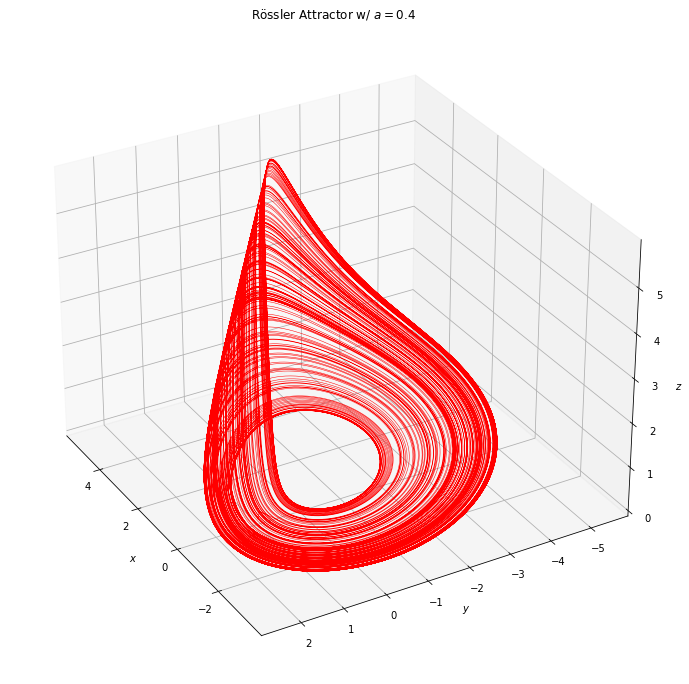

In [7]:
a = float(input('Enter the value of parameter a: '))

#Format figure for 3D plotting
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')

ax.set_title(rf'Rössler Attractor w/ $a =${a}')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')

#Assign coordinate values from lorenz_values to three lists
dim_values, t_values = rossler_values(a, 2, 4, 1000)
x, y, z = dim_values[0], dim_values[1], dim_values[2]

#Plot the attractor in 3D
ax.plot3D(x, y, z, c = 'r', linewidth = 0.5)

#Adjust viewing angle
ax.view_init(30, 150)

plt.show()

**b)** We then plot the attractor and $z(t)$ time series for multiple values of $a$.

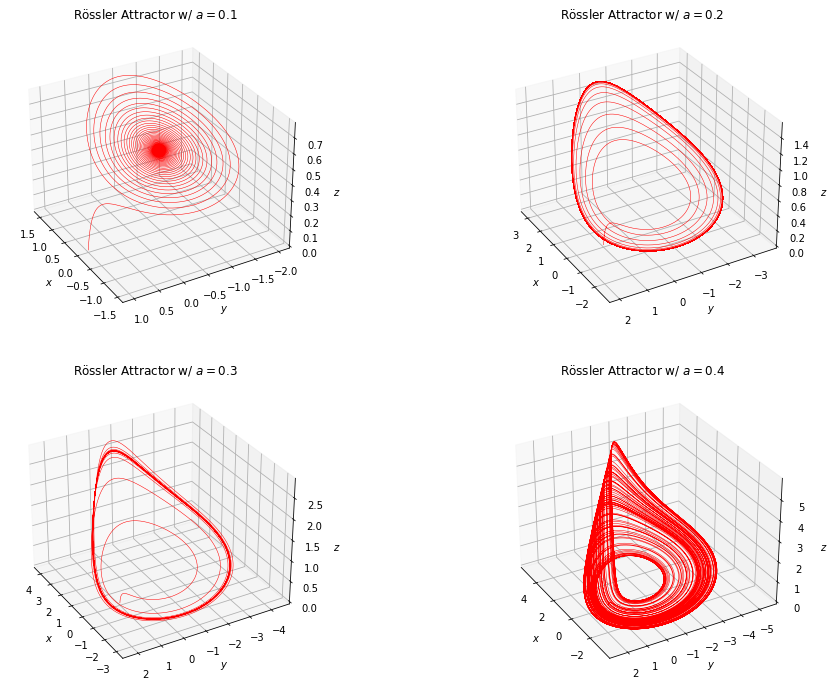

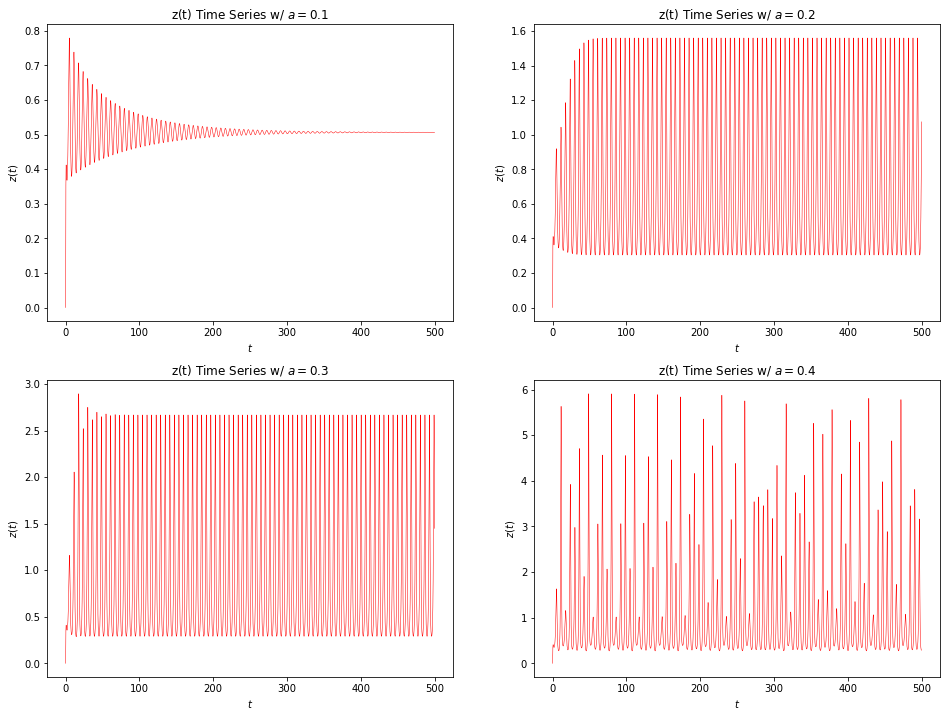

In [24]:
#Format figure for 3D plotting
fig1 = plt.figure(figsize=(16, 12))

fig2, ax2 = plt.subplots(2, 2, figsize=(16, 12))
ax2 = ax2.flatten()

a_list = [0.1, 0.2, 0.3, 0.4]

#plot four instances of the system
for n in range(4):
    a = a_list[n]
    
    ax1 = fig1.add_subplot(2, 2, n+1, projection='3d')
    
    #Assign coordinate values from lorenz_values to three lists
    dim_values, t_values = rossler_values(a, 2, 4, 500)
    x, y, z = dim_values[0], dim_values[1], dim_values[2]
    
    ax1.plot3D(x, y, z, c = 'r', linewidth = 0.5)
    ax2[n].plot(t_values, dim_values[2], c = 'r', linewidth = 0.5)

    #Formar attractor figure
    ax1.set_title(rf'Rössler Attractor w/ $a =${a}')
    ax1.set_xlabel(r'$x$')
    ax1.set_ylabel(r'$y$')
    ax1.set_zlabel(r'$z$')
    
    #Format time series figure
    ax2[n].set_title(rf'z(t) Time Series w/ $a =${a}')
    ax2[n].set_xlabel(r'$t$')
    ax2[n].set_ylabel(r'$z(t)$')

    #Adjust viewing angle
    ax1.view_init(30, 150)

plt.show()

**Exercise 12.4.3** Rössler Attractor Reconstruction

We obtain a time series for $x(t)$ by numerically integrating the Rössler system with the parameter values $a = 0.4, b = 2$ and $c = 4$.

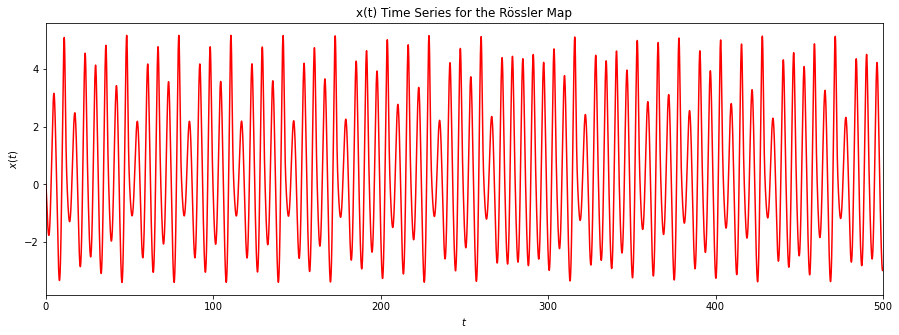

In [5]:
dim_values, t_values = rossler_values(0.4, 2, 4, 500)

#Format figure
plt.figure(figsize=(15, 5))
plt.title('x(t) Time Series for the Rössler Map')
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.xlim(0, 500)

plt.plot(t_values, dim_values[0], c = 'r')

plt.show()

Enter the delay for embedding: 150


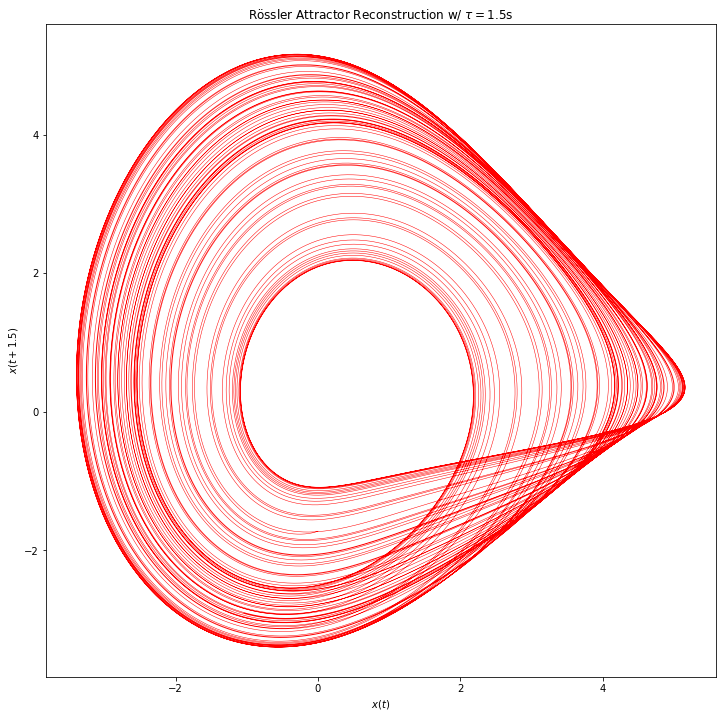

In [10]:
#Reconstruct the Rössler attractor using delayed coordinate embedding

#Ask for the delay for plotting x(t + delay*time_step) vs x(t)
delay = int(input('Enter the delay for embedding: '))

plt.figure(figsize=(12, 12))

plt.plot(dim_values[0][:-delay], dim_values[0][delay:], c = 'r', linewidth = 0.5)

plt.title(rf'Rössler Attractor Reconstruction w/ $\tau =${delay*0.01}s')
plt.xlabel(r'$x(t)$')
plt.ylabel(rf'$x(t + {delay * 0.01})$')

plt.show()

A time delay of $\tau \approx 1.5$s seems to yield a graph closely resembling the original attractor.

## Project: Synchronised Chaos

Synthesis of exercises 9.6.2–5 (Strogatz, p. 353–354).

Exploring the error dynamics of the transmitter and receiver systems and proving that the two synchronise exponentially fast (Exercise 9.6.2) was already done in lecture 25, so more attention will be paid to the numerical experiments.

### The Transmitter

Governed by the Lorenz equations:

$\dot x = \sigma (y - x)$

$\dot y = rx - y - xz$

$\dot z = xy - bz$

where we use the parameters $r= 60, \sigma = 10, b = \frac{8}{3}$.

In [90]:
#Retrieve a series of transmitter values from the lorenz_values function

trans_dim, trans_t = st.lorenz_values(60, 10, 8/3, 10, v_0 = [0, -37, 2])

### The Receiver

Governed by the equations:

$x_r = x(t)$

$\dot y_r = rx(t) - y_r - x(t) z_r$

$\dot z_r = x(t) y_r - b z_r$

In [91]:
#Modify the lorenz and lorenz_values functions to act as the receiver

#Argument drive_var takes the driving variable as x = 0, y = 1, z = 2
def receiver(v, r, sigma, b, drive_var):
    x, y, z = v[0], v[1], v[2]
    
    x_deriv = sigma*(y - x)
    y_deriv = r*x - y - x*z
    z_deriv = x*y - b*z
    
    derivs = np.array([x_deriv, y_deriv, z_deriv])
    
    derivs[drive_var] = 0
    
    return derivs

#Argument drive takes a list of the values of the driving variable
def receiver_values(r, sigma, b, t, drive_var, drive, time_step = 0.01, v_0 = [0, 1, 0]):
    
    #Create lists of the (x, y, z) and time values
    dim_values = [[], [], []]
    t_values = []
    
    #Define the receiver equations with fixed parameters
    def receiver_var(v):
        return receiver(v, r = r, sigma = sigma, b = b, drive_var = drive_var)
    
    #Declare initial condition
    v = v_0
    
    for m in range(3):
        dim_values[m].append(v_0[m]) 
        
    #Iterate over time steps
    for step in np.arange(0, t-time_step, time_step):
        t_values.append(step)
     
        #Retrieve the next coordinates using fourth-order Runge-Kutta
        x = st.runge_kutta(v, receiver_var, dt = time_step)[0]
        y = st.runge_kutta(v, receiver_var, dt = time_step)[1]
        z = st.runge_kutta(v, receiver_var, dt = time_step)[2]
        
        v = np.array([x, y, z])
        
        v[drive_var] = drive[int(step/time_step+1)]

        #Add new values of (x, y, z) to the list dim_values
        for m in range(3):
            dim_values[m].append(v[m])
            
    t_values.append(t)
    
    return dim_values, t_values

receiver_dim, receiver_t = receiver_values(60, 10, 8/3, 10, 0, trans_dim[0], v_0 = [0, 60, -14])

### Synchronisation via $x(t)$

We then plot the $y(t)$ and $y_r(t)$ time series on the same graph.

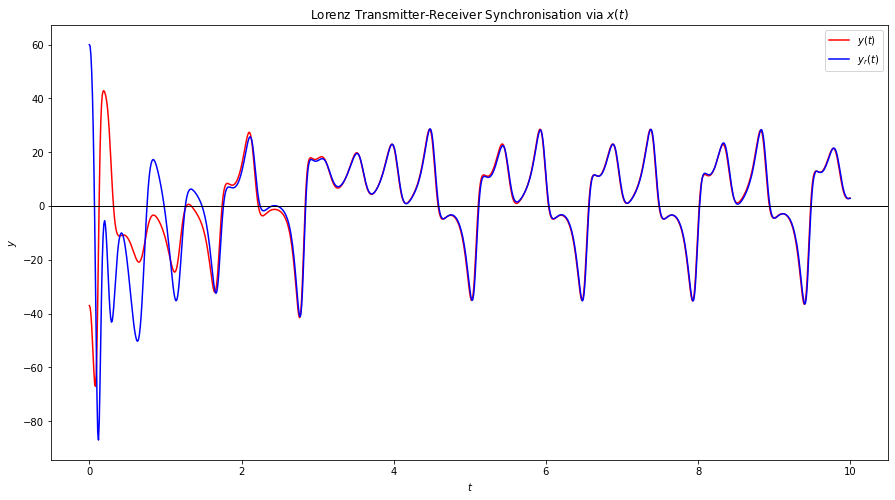

In [92]:
plt.figure(figsize=(15, 8))

#Plot the transmitter variable in red
plt.plot(trans_t, trans_dim[1], c = 'r', label = r'$y(t)$')

#Plot the receiver variable in blue
plt.plot(receiver_t, receiver_dim[1], c = 'b', label = r'$y_r(t)$')

#Format figure
plt.title(r'Lorenz Transmitter-Receiver Synchronisation via $x(t)$')
plt.xlabel(r'$t$')
plt.ylabel(r'$y$')
plt.legend()
plt.axhline(y=0, color='k', linewidth=1)

plt.show()

The two systems synchronise after $\approx$ 2 seconds, even though the receiver is driven only by the transmitter's $x(t)$ variable.

We can then graph the error $y(t) - y_r(t)$.

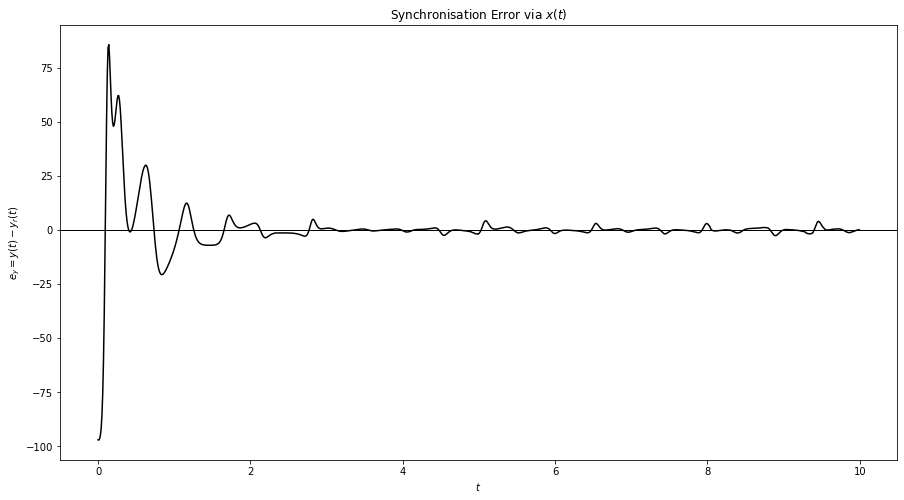

In [93]:
plt.figure(figsize=(15, 8))

error_y = [trans_dim[1][n] - receiver_dim[1][n] for n in range(len(trans_dim[1]))]

#Plot the error in y
plt.plot(trans_t, error_y, c = 'k')

plt.title(r'Synchronisation Error via $x(t)$')
plt.xlabel(r'$t$')
plt.ylabel(r'$e_y = y(t) - y_r(t)$')
plt.axhline(y=0, color='k', linewidth=1)

plt.show()

Some noise is present after the synchronisation, corresponding to the "fuzziness" remarked on by Strogatz.

We now compare the $(y, z)$ projections of the attractors of the two systems.

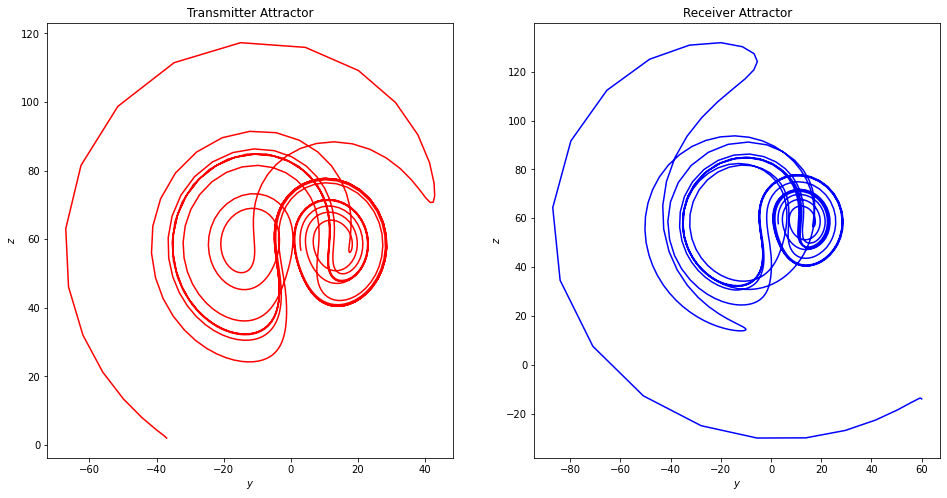

In [51]:
#Format subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].plot(trans_dim[1], trans_dim[2], c = 'r')
ax[1].plot(receiver_dim[1], receiver_dim[2], c = 'b')

for n in range(2):
    ax[n].set_xlabel(r'$y$')
    ax[n].set_ylabel(r'$z$')
    
ax[0].set_title('Transmitter Attractor')
ax[1].set_title('Receiver Attractor')

plt.show()

### Synchronisation via $z(t)$

Next, we try to synchronise the systems by using $z(t)$ as the driving variable.

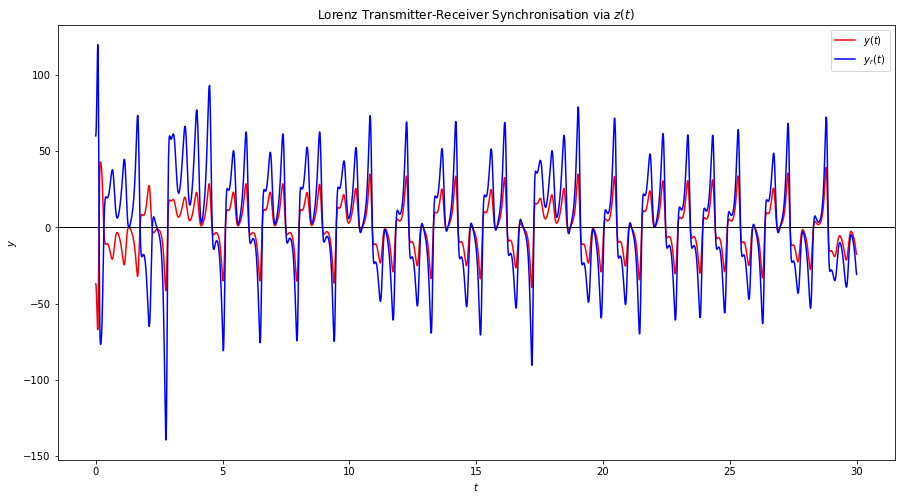

In [94]:
#Retrieve a series of transmitter values from the lorenz_values function
trans_dim, trans_t = st.lorenz_values(60, 10, 8/3, 30, v_0 = [0, -37, 2])


#Replace drive_var = 2 and drive = trans_dim[2] to correspond to z
receiver_dim, receiver_t = receiver_values(60, 10, 8/3, 30, 2, trans_dim[2], v_0 = [0, 60, -14])


plt.figure(figsize=(15, 8))

#Plot the transmitter variable y in red
plt.plot(trans_t, trans_dim[1], c = 'r', label = r'$y(t)$')

#Plot the receiver variable y in blue
plt.plot(receiver_t, receiver_dim[1], c = 'b', label = r'$y_r(t)$')


#Format figure
plt.title(r'Lorenz Transmitter-Receiver Synchronisation via $z(t)$')
plt.xlabel(r'$t$')
plt.ylabel(r'$y$')
plt.legend()
plt.axhline(y=0, color='k', linewidth=1)

plt.show()

Even with the longer time series, the two systems fail to synchronise. While the two trajectorie seem to converge towards the end, closer inspection (zoom in using plt.xlim) shows this is not the case. The same happens for the time series of $x(t)$.

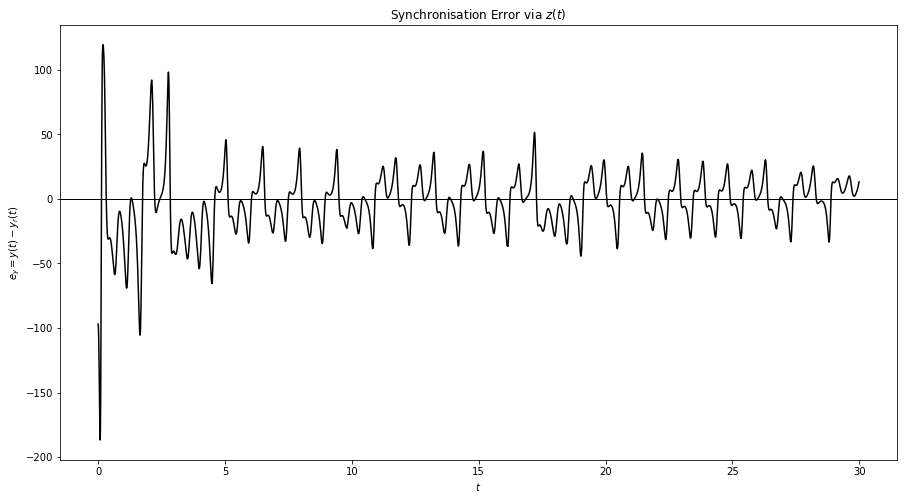

In [95]:
#Plot the error e_y in the z synchronisation case

plt.figure(figsize=(15, 8))

error_y = [trans_dim[1][n] - receiver_dim[1][n] for n in range(len(trans_dim[1]))]

#Plot the error in y
plt.plot(trans_t, error_y, c = 'k')

plt.title(r'Synchronisation Error via $z(t)$')
plt.xlabel(r'$t$')
plt.ylabel(r'$e_y = y(t) - y_r(t)$')
plt.axhline(y=0, color='k', linewidth=1)

plt.show()

No exponential synchronisation is to be seen in the data.

### Synchronisation via $y(t)$

Lastly, we'll attempt synchronising the two systems by using $y(t)$ as the driving variable.

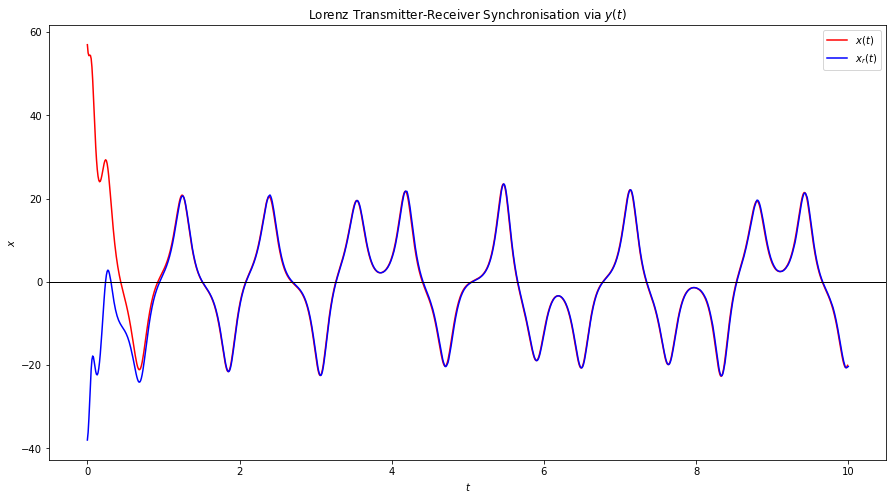

In [96]:
#Retrieve a series of transmitter values from the lorenz_values function
trans_dim, trans_t = st.lorenz_values(60, 5, 8/3, 10, v_0 = [57, 0, 2])


#Replace drive_var = 1 and drive = trans_dim[1] to correspond to y
receiver_dim, receiver_t = receiver_values(60, 5, 8/3, 10, 1, trans_dim[1], v_0 = [-38, 0, -14])


plt.figure(figsize=(15, 8))

#Plot the transmitter variable x in red
plt.plot(trans_t, trans_dim[0], c = 'r', label = r'$x(t)$')

#Plot the receiver variable x in blue
plt.plot(receiver_t, receiver_dim[0], c = 'b', label = r'$x_r(t)$')


#Format figure
plt.title(r'Lorenz Transmitter-Receiver Synchronisation via $y(t)$')
plt.xlabel(r'$t$')
plt.ylabel(r'$x$')
plt.legend()
plt.axhline(y=0, color='k', linewidth=1)

plt.show()

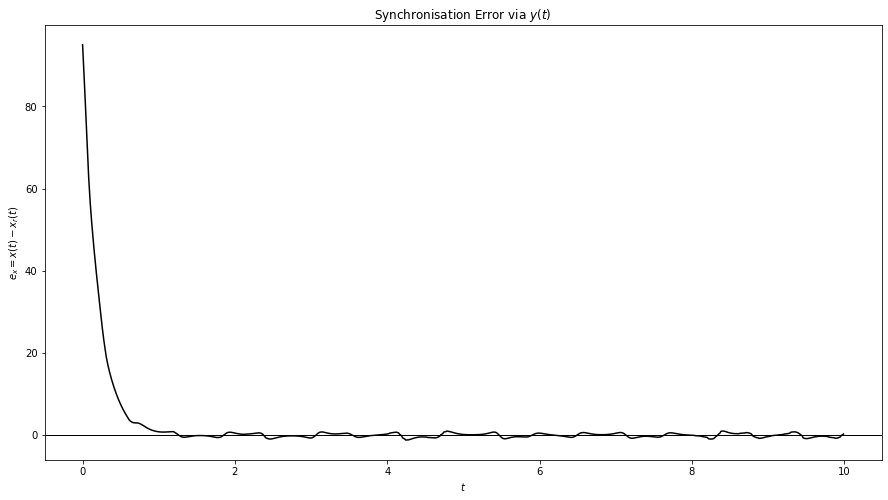

In [97]:
#Plot the error e_x in the y synchronisation case

plt.figure(figsize=(15, 8))

error_x = [trans_dim[0][n] - receiver_dim[0][n] for n in range(len(trans_dim[0]))]

#Plot the error in x
plt.plot(trans_t, error_x, c = 'k')

plt.title(r'Synchronisation Error via $y(t)$')
plt.xlabel(r'$t$')
plt.ylabel(r'$e_x = x(t) - x_r(t)$')
plt.axhline(y=0, color='k', linewidth=1)

plt.show()

Using the variable $y(t)$ as the driver, the synchronisation between the systems occurs extremely fast.

### Sending Masked Signals

We now attempt to send a message $m(t)$ in the form of a sine wave. The signal $s(t) = x(t) + m(t)$ will act as the driving variable for the receiver.

Cuomo and Oppenheim's receiver equations are:

$\dot x_r = \sigma \left( y_r - x_r \right)$

$\dot y_r = r s(t) - y_r - s(t) z_r$

$\dot z_r = s(t) y_r - b z_r$

These can be turned into code by modifying the Lorenz equations a second time.

In [151]:
#Define the receiver equations with s(t) as the drive
def message_receiver(v, r, sigma, b):
    
    x, y, z, s = v[0], v[1], v[2], v[3]
    
    x_deriv = sigma * (y - x)
    y_deriv = r*s - y - s*z
    z_deriv = s*y - b*z
    s_deriv = 0
    
    return np.array([x_deriv, y_deriv, z_deriv, s_deriv])

def message_receiver_values(r, sigma, b, t, signal_drive, time_step = 0.01, transient = 0, v_0 = [0, 1, 0, 0]):    
    #Create lists of the (x, y, z, s) and time values
    dim_values = [[], [], [], []]
    t_values = []
    
    #Define the receiver equations with fixed parameters
    def message_receiver_var(v):
        return message_receiver(v, r = r, sigma = sigma, b = b)
    
    #Declare initial condition
    v = v_0
    
    #Iterate over time steps
    for step in np.arange(0, t-time_step, time_step):
        t_values.append(step)
        
        #Add new values of (x, y, z, s) to the list dim_values
        for m in range(4):
            dim_values[m].append(v[m])
     
        #Retrieve the next coordinates using fourth-order Runge-Kutta
        v = st.runge_kutta(v, message_receiver_var, dt = time_step)
        v[3] = signal_drive[int(step/time_step+1)]
    
    return dim_values, t_values

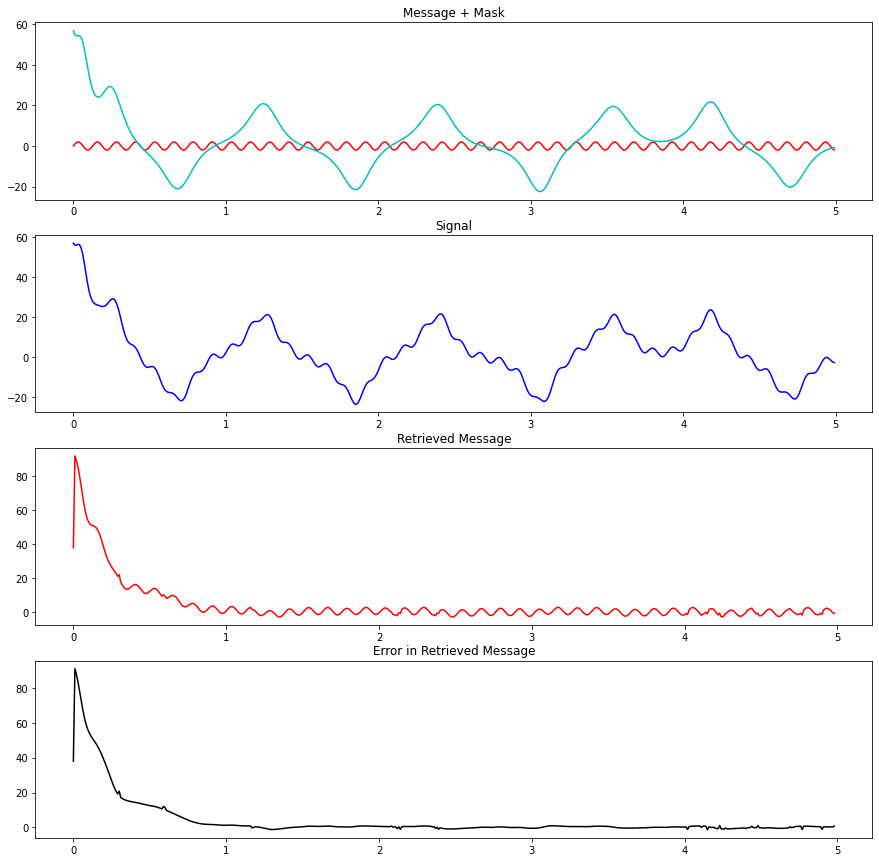

In [196]:
fig, ax = plt.subplots(4, 1, figsize=(15, 15))

#Declare time frame
t = 5

#Create the sine wave message; the number inside the brackets changes the frequency
message = 2*np.sin(50*np.arange(0, t, 0.01))

#Retrieve a series of transmitter values to act as the mask
trans_dim, trans_t = st.lorenz_values(60, 5, 8/3, t, v_0 = [57, 0, 2])

#Use x(t) as a mask
mask = trans_dim[0]
signal = [message[n] + mask[n] for n in range(len(mask))]

#Feed the masked message into the receiver
receiver_dim, receiver_t = message_receiver_values(60, 5, 8/3, t, signal, v_0 = [-38, 0, -14, 0])

#Retrieve the message as s - x_r
message_retrieve = [receiver_dim[3][n] - receiver_dim[0][n] for n in range(len(receiver_t))]

#Plot the original message and mask
ax[0].set_title('Message + Mask')
ax[0].plot(trans_t, message, c = 'r')
ax[0].plot(trans_t, mask, c = 'c')

#Plot the masked message / signal
ax[1].set_title('Signal')
ax[1].plot(trans_t, signal, c = 'b')

#Plot the desiphered message s - x_r
ax[2].set_title('Retrieved Message')
ax[2].plot(receiver_t, message_retrieve, c = 'r')

#Plot the error in the retrieved message
error = [message_retrieve[n] - message[n] for n in range(len(message)-1)]

ax[3].set_title('Error in Retrieved Message')
ax[3].plot(receiver_t, error, c = 'k')

plt.show()

Try different multipliers inside the brackets of the transmitted sine function (variable *message*).

$\Rightarrow$ Clearly at higher frequencies the resulting error in the retrieved message is smaller.

The next step in investigating the synchronised transmitter-receiver system would be to attempt sending other types of signals (e.g. bitstream, sawtooth).

**This marks the end of the SLICC.**